In [378]:
import scipy as sp
from scipy import sparse
import networkx as nx
from scipy.io import mmread
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
import heapq
import copy

In [379]:
G = nx.read_edgelist("data2.txt", nodetype=int, data=(("weight", int),))
G = nx.Graph(G)

In [380]:
list(G.edges(data=True))

[(0, 1, {'weight': 1}),
 (0, 5, {'weight': 100}),
 (0, 4, {'weight': 4}),
 (1, 2, {'weight': 1}),
 (1, 3, {'weight': 2}),
 (2, 3, {'weight': 1}),
 (2, 5, {'weight': 3}),
 (3, 4, {'weight': 1}),
 (4, 5, {'weight': 1})]

In [381]:
def print_graph(inp_graph, ct):
    pos = nx.spring_layout(inp_graph)
    nx.draw_networkx(inp_graph, pos)
    labels = nx.get_edge_attributes(inp_graph, 'weight')
    x = nx.draw_networkx_edge_labels(inp_graph, pos, edge_labels=labels)
    plt.show("filename" + str(ct) + ".png")

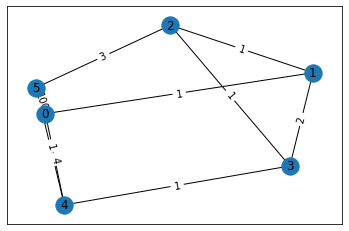

In [382]:
# Initialize
input_graph = copy.deepcopy(G)
print_graph(input_graph, 0)
no_of_nodes = input_graph.number_of_nodes()
heap = [] # store as (node, g-value)
# visited = []

In [383]:
print(input_graph.number_of_nodes())
# print_graph(input_graph, 0)

6


In [384]:
def kruskalAlgo(inp_graph):
    # stores the edges present in MST
    MST = []
    index = 0
    cost = 0
    ct = 0
    nodes = inp_graph.number_of_nodes()
    # temp graph
    graph = nx.Graph()
    # sort edges by increasing weight
    sorted_graph = sorted(inp_graph.edges(data=True), key=lambda item: item[2]['weight'])
    # MST contains exactly `V-1` edges
    i = 0
    for edgelist in sorted_graph:
        # consider the next edge with minimum weight from the graph
        
        (src, dest, weight) = edgelist
        weight = weight.get('weight')
        index = index + 1
        # add edge
        graph.add_edge(src, dest, weight=weight)
        # check for cycle
        lst = nx.cycle_basis(graph.to_undirected())
        if len(lst) == 0:
            # consider the wt if no cycle
            cost = cost + weight
            # i += 1
            # MST.append((src, dest, weight))
            # minimumCost = 0
            # N = nx.Graph()
            # print("Adding Src : " + str(src) + " Des : " + str(dest) + " Wt : " + str(weight))
            # for u, v, weight in MST:
            #     minimumCost += weight
            #     N.add_weighted_edges_from([(u, v, weight)])
            # print_graph(N, ct)
            # ct = ct + 1
        else:
            # discard the edge
            e = (src, dest, {"weight" : weight})
            graph.remove_edge(*e[:2])

        
    return graph, cost

In [385]:
#works
def get_g_n(inp_graph, src, dest, parent_g_n):
    return inp_graph[src][dest].get('weight') + parent_g_n

In [386]:
#works
def get_h_n_and_mst(inp_graph):
    graph, cost = kruskalAlgo(inp_graph)
    print("Cost of MST : ", cost)
    print_graph(graph, 0)
    return cost

In [387]:
#works
def remove_list_of_nodes_from_graph(inp_graph, lst):
    for i in lst:
        inp_graph.remove_node(int(i))
    return inp_graph

In [388]:
#works
def goal_test(no_of_nodes, visited):
    return len(visited) == no_of_nodes

In [389]:
def A_star(inp_graph, N):
    # ans
    ans = 0
    # visited list
    visited = []
    # deepcopy for aug graph
    temp = copy.deepcopy(inp_graph)
    # create augmented graph
    temp = remove_list_of_nodes_from_graph(temp, [0])
    # print_graph(input_graph, 0)
    # print_graph(temp, 0)
    # generate MST of augmented graph
    h_n = get_h_n_and_mst(temp)
    # push src node with FN = HN since GN = 0 
    heapq.heappush(heap, (h_n, 0, copy.deepcopy(visited)))
    # std bfs jaisa
    while len(list(heap)) != 0:
        # pop node with min fn value
        f_n, node, visited = heapq.heappop(heap)
        print(node)
        ans = f_n
        # make node visited
        visited.append(node)
        if goal_test(N, visited):
            print(visited)
            return ans
        # deepcopy for aug graph
        temp = copy.deepcopy(inp_graph)
        # create augmented graph
        temp = remove_list_of_nodes_from_graph(temp, visited)
        # generate MST of augmented graph
        h_n = get_h_n_and_mst(temp)
        # get edges of current node
        edges = []
        for u, v, weight in inp_graph.edges.data("weight"):
            if weight is not None:
                if u == node and v not in visited:
                    edges.append(v)
                elif v == node and u not in visited:
                    edges.append(u)
        # now we have all childs of node
        # push all those childs into heap
        for u in edges:
            # edge wt + parent's fn
            GN = get_g_n(inp_graph, node, u, f_n)
            heapq.heappush(heap, (GN + h_n, u, copy.deepcopy(visited)))

In [390]:
# def A_star(inp_graph, N , CN, visited, parent_gn):
#     # make current node visited
    
#     visited.append(CN)
#     if goal_test(N, visited, CN) == False:
#         # remove the visited nodes from graph and get augmented graph
#         # print_graph(inp_graph, 0)
#         temp_graph = copy.deepcopy(inp_graph)
#         aug_graph = remove_list_of_nodes_from_graph(temp_graph, visited)
#         # get mst from it and hn
#         print("Augmented graph")
#         print_graph(aug_graph,0)
#         h_n = get_h_n_and_mst(aug_graph)
#         # get list of edges from current node
#         # edges = inp_graph.edges(CN)
#         edges = []
#         for u, v, weight in inp_graph.edges.data("weight"):
#             if weight is not None:
#                 if u == CN or v == CN:
#                     edges.append((u,v))
#         # push all unvisited nodes to heap with f-value
#         print("Edges from " + str(CN))
#         print(edges)
#         for src, dest in edges:
#             if dest in visited:
#                 # add the node with f-value
#                 temp = copy.deepcopy(inp_graph)
#                 f_value = h_n + get_g_n(inp_graph, src, dest, parent_g_n)
#                 heapq.heappush(heap, (dest, parent_gn))
#         # extract node from heap with least f_value
#         node, node_g_value = heapq.heappop(heap)
#         # call a* on the node
#         return A_star(inp_graph, N , node, visited, node_g_value)
#     # goal test is true
#     # list visited stores the order in which nodes are visited
#     return visited

In [391]:
def Start_a_star():
    temp = copy.deepcopy(input_graph)
    # print_graph(input_graph, 0)
    # print(list(heap))
    # print(visited)
    # print(no_of_nodes)
    path = A_star(input_graph, no_of_nodes)
    print(path)

Cost of MST :  4


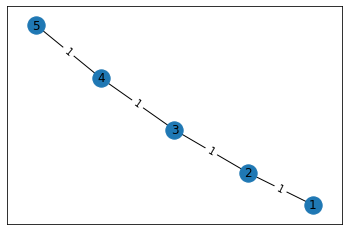

0
Cost of MST :  4


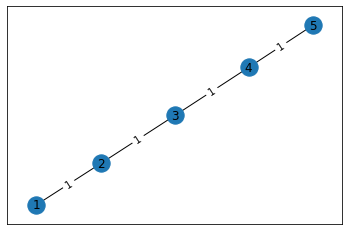

1
Cost of MST :  3


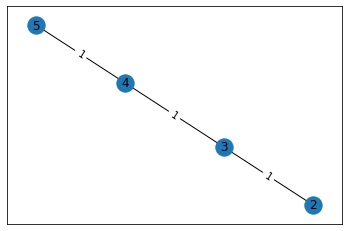

4
Cost of MST :  5


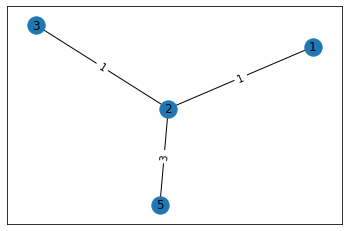

2
Cost of MST :  2


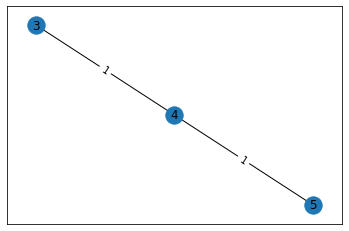

3
Cost of MST :  4


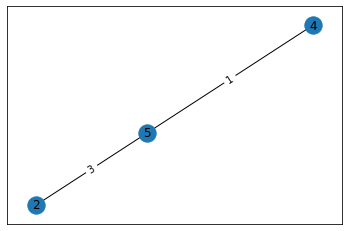

3
Cost of MST :  1


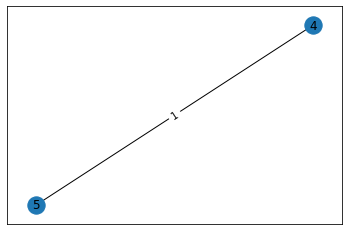

3
Cost of MST :  4


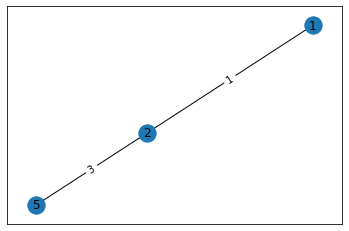

4
Cost of MST :  0


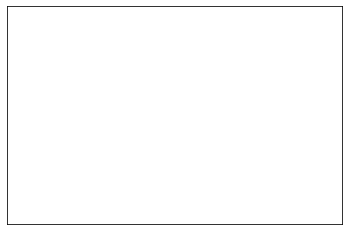

5
Cost of MST :  1


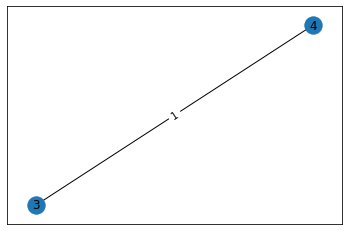

5
Cost of MST :  2


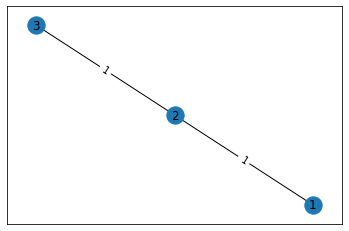

2
Cost of MST :  1


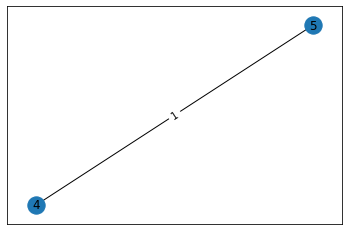

4
Cost of MST :  3


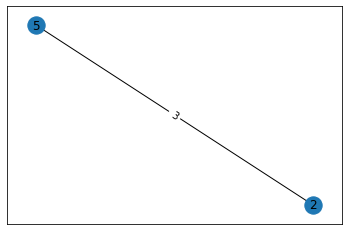

5
[0, 1, 2, 3, 4, 5]
19


In [392]:
Start_a_star()